# 5장 행렬로 변환 계산하기

## 5.1 선형변환을 행렬로 표현하기

### 5.1.1 행렬과 벡터 작성하기

In [3]:
T = (
    (0,-1, 0),
    (1, 0, 0),
    (0, 0, 1)
)

v = (1,2,3)

In [4]:
list(zip(*T))

[(0, 1, 0), (-1, 0, 0), (0, 0, 1)]

In [4]:
from vectors import *
def linear_combination(scalars,*vectors):
    scaled = [scale(s,v) for s,v in zip(scalars,vectors)]
    return add(*scaled)

In [9]:
def multiply_matrix_vector(matrix, vector):
    return linear_combination(vector, *zip(*matrix))

In [30]:
multiply_matrix_vector(T,v)

((0, 1, 0), (-1, 0, 0), (0, 0, 1))
[(0, 1, 0), (-2, 0, 0), (0, 0, 3)]


(-2, 1, 3)

### 5.1.3 행렬의 곱으로 변환 합성하기

### 5.1.4 행렬 곱 구현

In [3]:

from vectors import *

def matrix_multiply(a,b):
    return tuple(
        tuple(dot(row,col) for col in zip(*b))
        for row in a
    )

In [7]:
a = ((1,1,0),(1,0,1),(1,-1,1))

In [8]:
b = ((0,2,1),(0,1,0),(1,0,-1))

In [9]:
matrix_multiply(a,b)

((0, 3, 1), (1, 2, 0), (1, 1, 0))

In [10]:
c = ((1,2),(3,4))

In [11]:
d = ((0,-1),(1,0))

In [12]:
matrix_multiply(c,d)

((2, -1), (4, -3))

### 5.1.5 변환 행렬로 애니메이션 만들기

In [1]:
from math import sin,cos
def get_rotation_matrix(t): #1
    seconds = t/1000 #2
    return (
        (cos(seconds),0,-sin(seconds)),
        (0,1,0),
        (sin(seconds),0,cos(seconds))
    )

In [2]:
!python animate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


## 5.2 다른 형태의 행렬 해석하기

In [33]:
a = ((-1, 0, -1, -2, -2), (0, 0, 2, -2, 1), (-2, -1, -2, 0, 1), (0, 2, -2, -1, 0), (1, 1, -1, -1, 0))

In [34]:
b = ((-1, 0, -1, -2, -2), (0, 0, 2, -2, 1), (-2, -1, -2, 0, 1), (0, 2, -2, -1, 0), (1, 1, -1, -1, 0))

In [35]:
matrix_multiply(a,b)

((1, -5, 9, 6, 1),
 (-3, -5, -1, 1, 2),
 (7, 3, 3, 5, 1),
 (4, 0, 10, -3, 0),
 (1, -1, 5, -3, -2))

### 5.2.1 행렬로 보는 열벡터

In [16]:
c = ((-1, -1, 0), (-2, 1, 2), (1, 0, -1))

In [17]:
d = ((1,),(1,),(1,))

In [18]:
matrix_multiply(c,d)

((-2,), (1,), (0,))

In [19]:
multiply_matrix_vector(c,(1,1,1))

(-2, 1, 0)

### 5.2.6 Exercises

**Exercise:** 행 벡터를 열벡터로, 또는 열벡터를 행벡터로 변환하는 `transposition` (전치)함수를 작성하시오. (zip 함수를 사용하시오.)

In [ ]:
def transpose(matrix):
    return ?

In [ ]:
transpose(((1,),(2,),(3,)))

((1, 2, 3),)

In [ ]:
transpose(((1, 2, 3),))

((1,), (2,), (3,))

**Exercise:** 함수 `infer_matrix(n, transformation)` 는 차원의 수(n)와 선형 변환 함수(transformation)을 입력받는다. 반환 값은 해당 변환 함수(transformation)과 동일한 역할을 하는 n x n 행렬이다. 이와 같은 함수를 작성하여라.

In [ ]:
def infer_matrix(n, transformation):
    def standard_basis_vector(i):
        return tuple(1 if i==j else 0 for j in range(1,n+1)) #1
    standard_basis = [standard_basis_vector(i) for i in range(1,n+1)] #2
    cols = [?] #3
    return ? #4

In [6]:
from transforms import rotate_z_by
from math import pi

matrix = infer_matrix(3,rotate_z_by(pi/2))
print(matrix)

((6.123233995736766e-17, -1.0, 0.0), (1.0, 1.2246467991473532e-16, 0.0), (0, 0, 1))


In [11]:
u = (1,0,1)
u_p = multiply_matrix_vector(matrix, u)

print(u_p)

(6.123233995736766e-17, 1.0, 1)


**Exercise:** 이전에 작성했던 `infer_matrix` 함수를 이용해, xy 평면으로 투영하는 행렬을 만들어 보자.

In [20]:
def project_xy(v):
    x,y,z = v
    return (x,y)

In [ ]:
??

((1, 0, 0), (0, 1, 0))

## 5.3.1 평행 이동

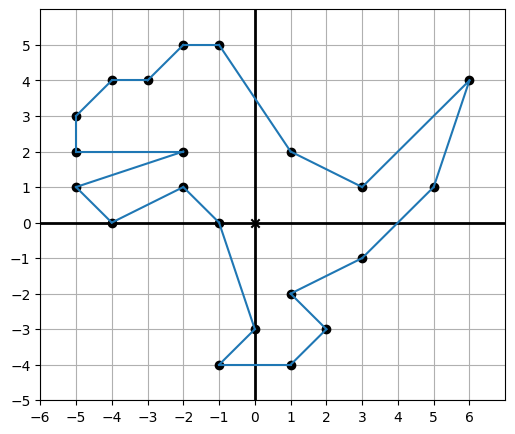

In [1]:
from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors),
    Polygon(*dino_vectors)
)

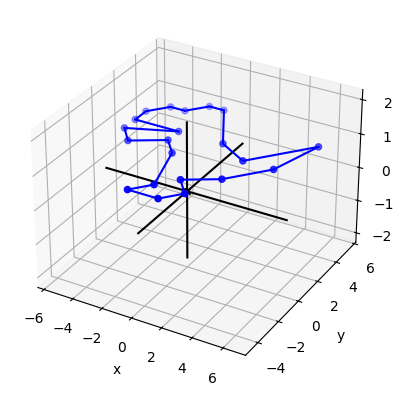

In [6]:
from draw3d import draw3d, Points3D, Segment3D

def polygon_segments_3d(points,color='blue'):
    count = len(points)
    return [Segment3D(points[i], points[(i+1) % count],color=color) for i in range(0,count)]

dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d)
)

In [7]:
magic_matrix = (
    (1,0,3),
    (0,1,1),
    (0,0,1))

In [10]:
translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

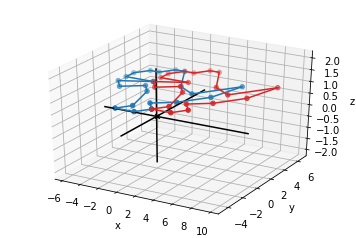

In [ ]:
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3'),
    save_as='figures/5.27.svg'
)

In [11]:
translated_2d = [(x,y) for (x,y,z) in translated]

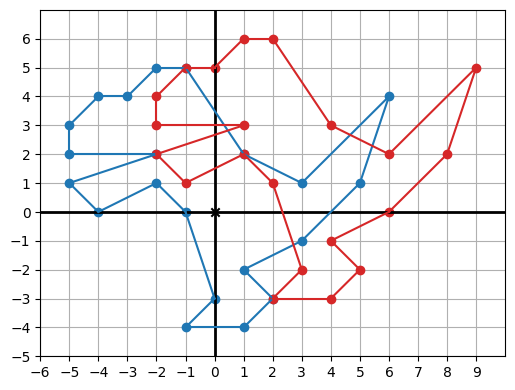

In [13]:
draw(
    Points(*dino_vectors,color='C0'),
    Polygon(*dino_vectors,color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3')
)

## 5.3.2 2차원 평행 이동을 하는 3차원 행렬

In [14]:
rotate_and_translate = ((0,-1,3),(1,0,1),(0,0,1))
rotated_translated_dino = [
    multiply_matrix_vector(rotate_and_translate, v) 
    for v in dino_3d]

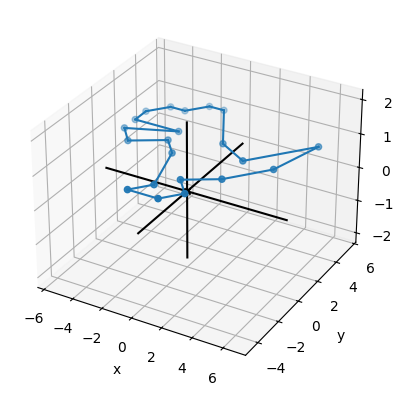

In [16]:
draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d, color='C0')
)

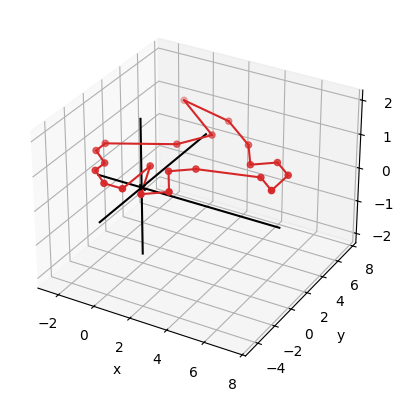

In [17]:
draw3d(
    Points3D(*rotated_translated_dino, color='C3'),
    *polygon_segments_3d(rotated_translated_dino, color='C3')
)

## 5.3.4 3차원 객체의 이동

In [18]:
def translate_3d(translation):
    def new_function(target): #1
        a,b,c = translation
        x,y,z = target
        matrix = ((1,0,0,a),(0,1,0,b),(0,0,1,c),(0,0,0,1)) #2
        vector = (x,y,z,1)
        x_out, y_out, z_out, _ = multiply_matrix_vector(matrix,vector) #3
        return (x_out,y_out,z_out)
    return new_function

In [19]:
!python matrix_translate_teapot.py

pygame 2.6.1 (SDL 2.28.4, Python 3.9.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 5.3.5 Exercises

**Exercise:** z 값에 1대신 2를 넣으면 (x, y, 2) 어떤 일이 벌어지는가? 비교하여 그려보라.

In [ ]:
dino_3d = [(x,y, ?) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='blue'),
    *polygon_segments_3d(dino_3d, color='C0')
)

translated = [multiply_matrix_vector(magic_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3')
)

translated_2d = [(x,y) for (x,y,z) in translated]

draw(
    Points(*dino_vectors, color='C0'),
    Polygon(*dino_vectors, color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3')
)

**Exercise:** x, y, 축으로 각각 -2 만큼 이동하는 행렬을 작성하고 그 결과를 보여라.

In [ ]:
translation_matrix = ?

# 확인 코드는 동일
dino_3d = [(x,y,1) for x,y in dino_vectors]

draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d, color='C0')
)

translated = [multiply_matrix_vector(translation_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3')
)

translated_2d = [(x,y) for (x,y,z) in translated]

draw(
    Points(*dino_vectors, color='C0'),
    Polygon(*dino_vectors, color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3')
)

**Mini-project:** 동차 좌표계를 활용하여 2차원 상의 dino를 $45^\circ$ 만큼 회전시키고, 크기를 0.5로 만들고, 벡터 (2,2) 만큼 이동하는 행렬을 만들어라. 그리고 그것이 적용된 결과를 보여라.

In [ ]:
# 45도 회전
rotation_matrix = ?

# 0.5로 축소
scale_matrix = ?

# (2, 2) 이동
translate_matrix = ?

# 최종 결합된 행렬
final_matrix = ?


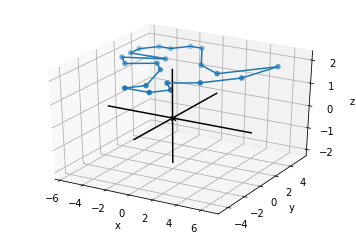

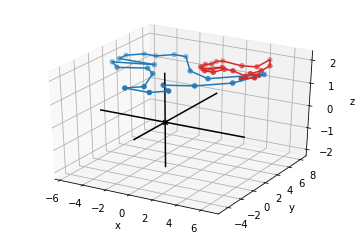

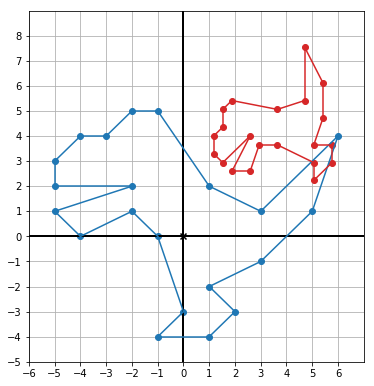

In [ ]:
#final matrix를 이용해 dino_vectors를 변환시키고 결과를 그린다.

draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d, color='C0')
)


# final_matrix 사용
translated = [multiply_matrix_vector(final_matrix, v) for v in dino_3d]

draw3d(
    Points3D(*dino_3d, color='C0'),
    *polygon_segments_3d(dino_3d,color='C0'),
    Points3D(*translated,color='C3'),
    *polygon_segments_3d(translated,color='C3')
)

translated_2d = [(x,y) for (x,y,z) in translated]

draw(
    Points(*dino_vectors, color='C0'),
    Polygon(*dino_vectors, color='C0'),
    Points(*translated_2d, color='C3'),
    Polygon(*translated_2d, color='C3'),
    save_as='figures/ex_5.3.5_third_dino.svg'
)